##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("train_images.shape: ", train_images.shape)

train_images.shape:  (50000, 32, 32, 3)


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


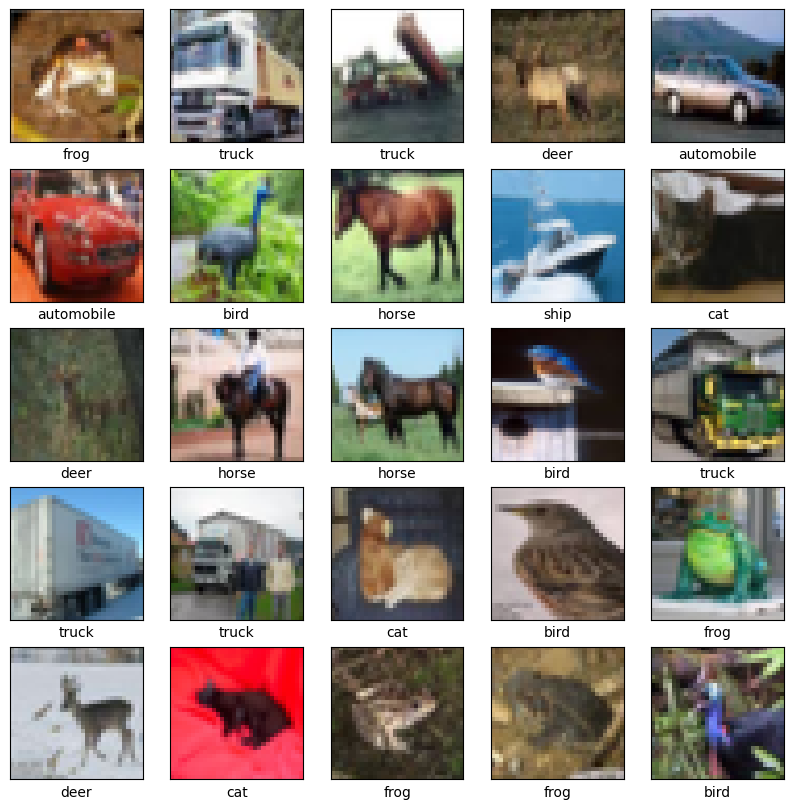

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\wuyan\Projects\Anaconda\envs\coursera\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's display the architecture of your model so far:

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


I0000 00:00:1723778386.322623  135108 service.cc:146] XLA service 0x7f254c005a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723778386.322659  135108 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1723778386.322663  135108 service.cc:154]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1723778386.322667  135108 service.cc:154]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
I0000 00:00:1723778386.322670  135108 service.cc:154]   StreamExecutor device (3): Tesla T4, Compute Capability 7.5



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:19:40 3s/step - accuracy: 0.0938 - loss: 2.3041


  22/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1232 - loss: 2.2976    


  46/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1340 - loss: 2.2834


  70/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1470 - loss: 2.2585

I0000 00:00:1723778388.120198  135108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



  94/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1576 - loss: 2.2336


 118/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1661 - loss: 2.2111


 143/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1747 - loss: 2.1888


 167/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1824 - loss: 2.1690


 192/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1899 - loss: 2.1491


 217/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1966 - loss: 2.1313


 241/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2027 - loss: 2.1155


 266/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2089 - loss: 2.0999


 291/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2148 - loss: 2.0849


 316/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2206 - loss: 2.0704


 341/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2260 - loss: 2.0564


 366/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2313 - loss: 2.0432


 391/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2362 - loss: 2.0307


 416/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2409 - loss: 2.0189


 442/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2455 - loss: 2.0074


 467/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2498 - loss: 1.9967


 493/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2541 - loss: 1.9861


 519/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2584 - loss: 1.9760


 544/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2623 - loss: 1.9665


 569/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2660 - loss: 1.9576


 594/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2696 - loss: 1.9489


 618/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2730 - loss: 1.9408


 643/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2764 - loss: 1.9327


 667/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2795 - loss: 1.9250


 692/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2827 - loss: 1.9174


 716/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2856 - loss: 1.9103


 740/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2884 - loss: 1.9034


 765/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2913 - loss: 1.8964


 790/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2941 - loss: 1.8895


 814/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2967 - loss: 1.8831


 839/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2994 - loss: 1.8765


 864/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3020 - loss: 1.8701


 888/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3045 - loss: 1.8641


 912/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3069 - loss: 1.8582


 936/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3093 - loss: 1.8525


 961/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3117 - loss: 1.8467


 985/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3140 - loss: 1.8412


1009/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3162 - loss: 1.8359


1032/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3182 - loss: 1.8310


1056/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3203 - loss: 1.8259


1080/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3224 - loss: 1.8209


1103/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.8163


1127/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3263 - loss: 1.8115


1152/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3284 - loss: 1.8066


1177/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3304 - loss: 1.8018


1202/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3323 - loss: 1.7971


1227/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7924


1252/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3361 - loss: 1.7879


1277/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3380 - loss: 1.7835


1302/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3398 - loss: 1.7791


1326/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 1.7750


1350/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3432 - loss: 1.7710


1374/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3448 - loss: 1.7670


1398/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.7631


1423/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3481 - loss: 1.7591


1448/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3497 - loss: 1.7552


1473/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3513 - loss: 1.7513


1498/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3529 - loss: 1.7475


1523/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3544 - loss: 1.7438


1547/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3559 - loss: 1.7402


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3569 - loss: 1.7378


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3569 - loss: 1.7377 - val_accuracy: 0.5424 - val_loss: 1.2687


Epoch 2/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:17 50ms/step - accuracy: 0.4688 - loss: 1.1854


  26/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5545 - loss: 1.1772   


  50/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5560 - loss: 1.1920


  74/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5554 - loss: 1.1979


 100/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5543 - loss: 1.2050


 125/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5541 - loss: 1.2086


 151/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5536 - loss: 1.2140


 177/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5536 - loss: 1.2175


 201/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5533 - loss: 1.2205


 226/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5528 - loss: 1.2234


 251/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5527 - loss: 1.2249


 276/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5530 - loss: 1.2257


 301/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5533 - loss: 1.2261


 326/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5537 - loss: 1.2263


 351/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5542 - loss: 1.2261


 376/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5547 - loss: 1.2257


 401/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5553 - loss: 1.2251


 426/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5558 - loss: 1.2247


 451/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5563 - loss: 1.2242


 476/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5567 - loss: 1.2237


 501/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5572 - loss: 1.2232


 526/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5576 - loss: 1.2227


 551/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5580 - loss: 1.2222


 575/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5585 - loss: 1.2216


 600/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5589 - loss: 1.2209


 625/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5594 - loss: 1.2202


 650/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5599 - loss: 1.2194


 676/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5604 - loss: 1.2186


 701/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5608 - loss: 1.2180


 726/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5612 - loss: 1.2173


 750/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5615 - loss: 1.2167


 774/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5619 - loss: 1.2162


 799/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5623 - loss: 1.2156


 823/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5626 - loss: 1.2151


 848/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5630 - loss: 1.2145


 872/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5633 - loss: 1.2139


 897/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5637 - loss: 1.2133


 922/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5640 - loss: 1.2126


 946/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5644 - loss: 1.2120


 971/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5647 - loss: 1.2113


 996/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5651 - loss: 1.2107


1021/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5654 - loss: 1.2100


1046/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5658 - loss: 1.2094


1071/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5661 - loss: 1.2087


1096/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 1.2080


1120/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5668 - loss: 1.2074


1144/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5671 - loss: 1.2068


1169/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 1.2062


1194/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 1.2055


1219/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 1.2049


1244/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 1.2042


1268/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5687 - loss: 1.2036


1293/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5690 - loss: 1.2030


1318/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 1.2024


1342/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5696 - loss: 1.2018


1366/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5699 - loss: 1.2013


1391/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5702 - loss: 1.2007


1416/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 1.2001


1440/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5707 - loss: 1.1995


1465/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5710 - loss: 1.1990


1490/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5713 - loss: 1.1984


1514/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 1.1978


1538/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 1.1972


1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5721 - loss: 1.1966


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5721 - loss: 1.1966 - val_accuracy: 0.5967 - val_loss: 1.1490


Epoch 3/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:12 46ms/step - accuracy: 0.8125 - loss: 0.6786


  24/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6838 - loss: 0.9586   


  47/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6592 - loss: 1.0065


  70/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6483 - loss: 1.0209


  92/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6415 - loss: 1.0309


 115/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6383 - loss: 1.0345


 138/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6364 - loss: 1.0354


 160/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6356 - loss: 1.0355


 183/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6348 - loss: 1.0362


 206/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6338 - loss: 1.0378


 229/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6331 - loss: 1.0387


 252/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6328 - loss: 1.0387


 275/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6325 - loss: 1.0386


 299/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6324 - loss: 1.0386


 323/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6323 - loss: 1.0389


 346/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6323 - loss: 1.0389


 370/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6323 - loss: 1.0391


 394/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6322 - loss: 1.0394


 418/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6323 - loss: 1.0394


 441/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6324 - loss: 1.0393


 465/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6326 - loss: 1.0389


 489/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6329 - loss: 1.0385


 512/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6331 - loss: 1.0380


 536/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6332 - loss: 1.0376


 559/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6334 - loss: 1.0370


 583/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6337 - loss: 1.0364


 607/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6339 - loss: 1.0359


 630/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6341 - loss: 1.0354


 654/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6343 - loss: 1.0349


 678/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6345 - loss: 1.0345


 702/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6347 - loss: 1.0340


 726/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6349 - loss: 1.0336


 750/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6351 - loss: 1.0331


 774/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6353 - loss: 1.0327


 798/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6355 - loss: 1.0323


 822/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6356 - loss: 1.0319


 846/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6358 - loss: 1.0316


 870/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6360 - loss: 1.0312


 893/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6361 - loss: 1.0309


 917/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6362 - loss: 1.0306


 941/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6364 - loss: 1.0303


 965/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6365 - loss: 1.0300


 989/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6367 - loss: 1.0297


1013/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6368 - loss: 1.0294


1037/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6369 - loss: 1.0292


1061/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6370 - loss: 1.0289


1085/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6371 - loss: 1.0287


1109/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6373 - loss: 1.0284


1133/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - loss: 1.0281


1157/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 1.0278


1180/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 1.0275


1204/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6377 - loss: 1.0272


1228/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - loss: 1.0269


1251/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 1.0267


1275/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 1.0264


1299/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - loss: 1.0262


1322/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.0260


1345/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.0258


1369/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - loss: 1.0256


1393/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - loss: 1.0254


1416/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 1.0252


1439/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 1.0250


1463/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 1.0248


1486/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 1.0246


1510/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 1.0244


1534/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6388 - loss: 1.0242


1558/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6389 - loss: 1.0240


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6389 - loss: 1.0240 - val_accuracy: 0.6467 - val_loss: 0.9909


Epoch 4/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:15 48ms/step - accuracy: 0.5938 - loss: 1.2151


  23/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6706 - loss: 0.9344   


  45/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6723 - loss: 0.9242


  67/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6708 - loss: 0.9287


  89/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6697 - loss: 0.9329


 111/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6697 - loss: 0.9331


 133/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6699 - loss: 0.9335


 155/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6702 - loss: 0.9330


 177/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6709 - loss: 0.9315


 199/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6716 - loss: 0.9300


 221/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6724 - loss: 0.9284


 243/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6732 - loss: 0.9266


 265/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6736 - loss: 0.9256


 287/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6737 - loss: 0.9251


 309/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6739 - loss: 0.9245


 331/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6741 - loss: 0.9239


 353/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6743 - loss: 0.9234


 376/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6745 - loss: 0.9227


 399/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6748 - loss: 0.9220


 422/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6749 - loss: 0.9214


 445/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6751 - loss: 0.9209


 469/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6752 - loss: 0.9204


 493/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6753 - loss: 0.9200


 516/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6754 - loss: 0.9197


 539/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6754 - loss: 0.9195


 562/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6754 - loss: 0.9194


 586/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6753 - loss: 0.9194


 610/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6752 - loss: 0.9195


 634/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6752 - loss: 0.9195


 657/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6752 - loss: 0.9195


 680/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.9195


 703/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.9195


 726/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.9194


 749/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.9193


 773/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.9192


 797/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.9191


 821/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6753 - loss: 0.9189


 844/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6754 - loss: 0.9187


 868/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6754 - loss: 0.9185


 892/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6755 - loss: 0.9182


 915/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6755 - loss: 0.9180


 938/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6756 - loss: 0.9178


 961/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6756 - loss: 0.9176


 984/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6757 - loss: 0.9175


1007/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6757 - loss: 0.9173


1030/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6758 - loss: 0.9172


1054/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6758 - loss: 0.9171


1077/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6758 - loss: 0.9170


1100/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6758 - loss: 0.9168


1124/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.9167


1147/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.9167


1170/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.9166


1194/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.9165


1218/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.9165


1242/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.9164


1265/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.9164


1288/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.9164


1311/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.9164


1333/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.9163


1356/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.9163


1379/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.9163


1403/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.9163


1427/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.9162


1450/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.9162


1473/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.9161


1496/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.9160


1519/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.9160


1543/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.9159


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6764 - loss: 0.9159 - val_accuracy: 0.6715 - val_loss: 0.9493


Epoch 5/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:13 47ms/step - accuracy: 0.5938 - loss: 0.9861


  23/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6677 - loss: 0.9050   


  44/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6748 - loss: 0.8918


  66/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6757 - loss: 0.8906


  88/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6782 - loss: 0.8853


 109/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6810 - loss: 0.8805


 130/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6828 - loss: 0.8780


 152/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6836 - loss: 0.8777


 174/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6834 - loss: 0.8788


 196/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6837 - loss: 0.8793


 218/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6841 - loss: 0.8791


 240/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6847 - loss: 0.8784


 262/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6851 - loss: 0.8775


 284/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6857 - loss: 0.8763


 307/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6864 - loss: 0.8750


 330/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6870 - loss: 0.8737


 353/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6875 - loss: 0.8728


 376/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6880 - loss: 0.8720


 399/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6885 - loss: 0.8710


 422/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6889 - loss: 0.8701


 444/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6893 - loss: 0.8692


 466/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6897 - loss: 0.8684


 489/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6901 - loss: 0.8676


 511/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6905 - loss: 0.8670


 534/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6908 - loss: 0.8662


 557/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6912 - loss: 0.8655


 579/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6915 - loss: 0.8650


 602/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6918 - loss: 0.8645


 624/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6921 - loss: 0.8641


 647/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6923 - loss: 0.8637


 670/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6926 - loss: 0.8633


 693/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6928 - loss: 0.8629


 716/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6931 - loss: 0.8625


 740/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6933 - loss: 0.8621


 763/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6935 - loss: 0.8616


 787/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 0.8612


 810/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6940 - loss: 0.8608


 834/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6943 - loss: 0.8603


 858/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6945 - loss: 0.8598


 882/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6947 - loss: 0.8594


 905/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6949 - loss: 0.8590


 928/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6951 - loss: 0.8587


 950/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6953 - loss: 0.8583


 973/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6955 - loss: 0.8579


 996/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6957 - loss: 0.8575


1020/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6958 - loss: 0.8571


1044/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6960 - loss: 0.8566


1068/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6962 - loss: 0.8562


1092/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6964 - loss: 0.8558


1116/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6966 - loss: 0.8554


1140/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 0.8550


1163/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - loss: 0.8547


1187/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6970 - loss: 0.8544


1211/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6972 - loss: 0.8541


1235/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 0.8539


1259/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6974 - loss: 0.8536


1283/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6976 - loss: 0.8533


1307/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 0.8530


1331/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6978 - loss: 0.8528


1355/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.8525


1379/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6981 - loss: 0.8523


1403/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - loss: 0.8520


1427/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - loss: 0.8518


1451/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 0.8515


1475/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6985 - loss: 0.8513


1499/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - loss: 0.8511


1523/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.8509


1547/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - loss: 0.8507


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6989 - loss: 0.8506 - val_accuracy: 0.6999 - val_loss: 0.8737


Epoch 6/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:13 47ms/step - accuracy: 0.6250 - loss: 0.8435


  24/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6897 - loss: 0.8113   


  48/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7101 - loss: 0.7816


  73/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7198 - loss: 0.7702


  97/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7223 - loss: 0.7697


 121/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7237 - loss: 0.7687


 146/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7246 - loss: 0.7687


 170/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7251 - loss: 0.7687


 194/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7253 - loss: 0.7694


 218/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7255 - loss: 0.7701


 242/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7254 - loss: 0.7715


 266/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7253 - loss: 0.7732


 290/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7255 - loss: 0.7743


 314/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7257 - loss: 0.7750


 338/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7258 - loss: 0.7757


 363/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7260 - loss: 0.7767


 387/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7260 - loss: 0.7777


 412/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7261 - loss: 0.7787


 436/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7262 - loss: 0.7793


 461/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7263 - loss: 0.7798


 485/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7263 - loss: 0.7802


 510/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7264 - loss: 0.7805


 535/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7266 - loss: 0.7807


 559/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7267 - loss: 0.7809


 583/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7268 - loss: 0.7810


 607/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7269 - loss: 0.7811


 632/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7271 - loss: 0.7811


 657/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7272 - loss: 0.7810


 682/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7273 - loss: 0.7810


 707/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7274 - loss: 0.7809


 732/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7276 - loss: 0.7807


 757/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7277 - loss: 0.7806


 782/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7278 - loss: 0.7805


 806/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7278 - loss: 0.7804


 831/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


 856/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


 881/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


 905/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


 929/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


 954/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


 979/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


1004/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7803


1029/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


1053/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


1078/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7804


1103/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7278 - loss: 0.7805


1128/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7278 - loss: 0.7806


1152/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7278 - loss: 0.7806


1177/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.7807


1201/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.7807


1226/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.7807


1251/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.7807


1276/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.7808


1301/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.7808


1325/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7808


1350/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7809


1375/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7809


1399/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7809


1424/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7809


1449/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7809


1474/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7810


1499/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.7810


1524/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.7810


1549/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.7811


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7275 - loss: 0.7811 - val_accuracy: 0.7032 - val_loss: 0.8687


Epoch 7/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:15 48ms/step - accuracy: 0.7188 - loss: 0.6011


  24/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7582 - loss: 0.6368   


  47/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7508 - loss: 0.6678


  70/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7499 - loss: 0.6820


  93/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7489 - loss: 0.6915


 117/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7496 - loss: 0.6933


 140/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7509 - loss: 0.6927


 163/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7518 - loss: 0.6931


 186/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7526 - loss: 0.6934


 210/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.6937


 233/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7537 - loss: 0.6943


 256/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7543 - loss: 0.6942


 279/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7548 - loss: 0.6941


 302/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7550 - loss: 0.6943


 326/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7552 - loss: 0.6945


 350/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7552 - loss: 0.6948


 373/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7552 - loss: 0.6953


 396/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7551 - loss: 0.6958


 419/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7550 - loss: 0.6965


 442/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7548 - loss: 0.6972


 465/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7545 - loss: 0.6980


 488/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7543 - loss: 0.6987


 511/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7540 - loss: 0.6994


 534/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7537 - loss: 0.7001


 557/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7535 - loss: 0.7007


 579/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.7013


 602/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7530 - loss: 0.7018


 625/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7529 - loss: 0.7023


 648/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7527 - loss: 0.7028


 671/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7525 - loss: 0.7033


 694/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.7038


 718/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7522 - loss: 0.7043


 742/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7520 - loss: 0.7048


 765/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7518 - loss: 0.7052


 788/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7517 - loss: 0.7057


 811/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7515 - loss: 0.7061


 834/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.7066


 857/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7512 - loss: 0.7069


 880/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7511 - loss: 0.7073


 904/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7510 - loss: 0.7077


 927/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7509 - loss: 0.7081


 950/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7507 - loss: 0.7084


 973/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7506 - loss: 0.7088


 996/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7504 - loss: 0.7092


1019/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7503 - loss: 0.7095


1042/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7502 - loss: 0.7098


1065/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7501 - loss: 0.7101


1088/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.7104


1111/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7499 - loss: 0.7107


1135/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7497 - loss: 0.7110


1159/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7496 - loss: 0.7113


1183/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.7116


1207/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7494 - loss: 0.7119


1231/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 0.7122


1255/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.7124


1279/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7491 - loss: 0.7127


1303/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.7130


1327/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7489 - loss: 0.7133


1351/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7488 - loss: 0.7135


1375/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7487 - loss: 0.7138


1399/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7486 - loss: 0.7141


1423/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.7143


1447/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7484 - loss: 0.7146


1472/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.7149


1496/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.7152


1520/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.7155


1545/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7480 - loss: 0.7158


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7479 - loss: 0.7160 - val_accuracy: 0.7088 - val_loss: 0.8571


Epoch 8/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:14 48ms/step - accuracy: 0.7188 - loss: 0.8551


  25/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7536 - loss: 0.7247   


  49/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7609 - loss: 0.6925


  74/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7659 - loss: 0.6765


  99/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7683 - loss: 0.6690


 123/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7697 - loss: 0.6649


 148/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7705 - loss: 0.6625


 172/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7706 - loss: 0.6619


 197/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7708 - loss: 0.6618


 221/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7705 - loss: 0.6624


 246/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7701 - loss: 0.6633


 270/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7697 - loss: 0.6643


 295/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7694 - loss: 0.6648


 319/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7693 - loss: 0.6649


 344/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7691 - loss: 0.6653


 369/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7690 - loss: 0.6658


 394/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7689 - loss: 0.6662


 418/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7689 - loss: 0.6665


 442/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7688 - loss: 0.6668


 467/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7688 - loss: 0.6672


 492/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7686 - loss: 0.6677


 517/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7684 - loss: 0.6680


 542/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7682 - loss: 0.6684


 566/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7681 - loss: 0.6687


 591/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7679 - loss: 0.6691


 616/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7677 - loss: 0.6695


 641/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7675 - loss: 0.6699


 666/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7673 - loss: 0.6702


 691/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7672 - loss: 0.6705


 716/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7671 - loss: 0.6707


 741/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7670 - loss: 0.6710


 766/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.6713


 791/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7668 - loss: 0.6715


 816/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.6717


 841/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7666 - loss: 0.6720


 866/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7664 - loss: 0.6722


 891/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7664 - loss: 0.6724


 916/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7663 - loss: 0.6726


 941/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7662 - loss: 0.6728


 966/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7661 - loss: 0.6730


 991/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7661 - loss: 0.6731


1016/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7660 - loss: 0.6733


1041/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7659 - loss: 0.6734


1066/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7659 - loss: 0.6736


1091/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.6737


1116/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.6738


1141/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 0.6739


1166/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 0.6739


1191/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 0.6740


1216/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.6740


1241/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.6740


1266/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.6741


1291/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.6742


1316/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.6742


1341/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.6743


1366/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.6744


1391/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.6745


1416/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.6746


1441/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.6747


1466/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.6748


1491/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.6749


1516/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.6750


1541/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.6751


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7650 - loss: 0.6752 - val_accuracy: 0.7035 - val_loss: 0.8852


Epoch 9/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:13 47ms/step - accuracy: 0.7812 - loss: 0.5414


  24/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7874 - loss: 0.6205   


  48/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7879 - loss: 0.6153


  72/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7876 - loss: 0.6167


  95/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7875 - loss: 0.6167


 118/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7867 - loss: 0.6200


 141/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7859 - loss: 0.6224


 165/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7853 - loss: 0.6242


 188/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7845 - loss: 0.6261


 212/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7839 - loss: 0.6271


 235/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7834 - loss: 0.6277


 259/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7830 - loss: 0.6282


 283/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7826 - loss: 0.6287


 306/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7823 - loss: 0.6292


 330/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7820 - loss: 0.6294


 354/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7818 - loss: 0.6295


 378/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7816 - loss: 0.6296


 401/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7814 - loss: 0.6296


 424/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7811 - loss: 0.6298


 447/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7808 - loss: 0.6301


 471/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7805 - loss: 0.6305


 495/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7803 - loss: 0.6307


 518/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7802 - loss: 0.6309


 542/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7801 - loss: 0.6310


 566/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7801 - loss: 0.6311


 589/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7800 - loss: 0.6312


 612/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7800 - loss: 0.6313


 636/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7800 - loss: 0.6314


 660/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7799 - loss: 0.6316


 684/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7799 - loss: 0.6318


 708/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.6319


 732/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.6320


 755/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.6321


 779/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.6321


 803/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.6322


 827/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7797 - loss: 0.6323


 851/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7797 - loss: 0.6325


 874/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.6328


 897/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7795 - loss: 0.6330


 920/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.6333


 943/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.6334


 967/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7793 - loss: 0.6336


 991/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7793 - loss: 0.6338


1015/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.6340


1039/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7791 - loss: 0.6341


1062/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7791 - loss: 0.6343


1086/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7790 - loss: 0.6345


1110/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - loss: 0.6346


1133/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.6348


1156/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.6349


1180/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.6350


1203/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.6352


1227/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.6353


1251/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.6354


1275/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.6356


1299/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.6357


1323/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.6359


1347/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.6360


1371/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - loss: 0.6361


1395/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - loss: 0.6363


1418/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.6364


1441/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.6366


1464/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.6367


1488/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.6368


1512/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.6369


1536/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.6371


1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.6372


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7780 - loss: 0.6372 - val_accuracy: 0.7126 - val_loss: 0.8672


Epoch 10/10



   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:12 47ms/step - accuracy: 0.9062 - loss: 0.3208


  24/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8187 - loss: 0.4975   


  46/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8116 - loss: 0.5203


  68/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8089 - loss: 0.5317


  90/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8076 - loss: 0.5366


 112/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8073 - loss: 0.5397


 135/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8067 - loss: 0.5425


 158/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8061 - loss: 0.5446


 181/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8057 - loss: 0.5466


 203/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8052 - loss: 0.5486


 226/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8048 - loss: 0.5504


 248/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8044 - loss: 0.5523


 271/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8040 - loss: 0.5541


 294/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8037 - loss: 0.5557


 317/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8034 - loss: 0.5571


 339/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8030 - loss: 0.5586


 361/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8027 - loss: 0.5599


 384/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8024 - loss: 0.5612


 406/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8021 - loss: 0.5623


 428/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8018 - loss: 0.5634


 450/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8015 - loss: 0.5645


 472/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8012 - loss: 0.5655


 494/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8010 - loss: 0.5665


 516/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8007 - loss: 0.5676


 539/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8004 - loss: 0.5686


 562/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8001 - loss: 0.5695


 585/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.5703


 608/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7996 - loss: 0.5711


 630/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7994 - loss: 0.5718


 652/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7992 - loss: 0.5725


 674/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7990 - loss: 0.5730


 696/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.5736


 718/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.5741


 740/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.5745


 762/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.5749


 784/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.5752


 806/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.5756


 828/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.5759


 850/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.5763


 872/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7976 - loss: 0.5767


 893/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.5771


 914/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.5774


 936/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7973 - loss: 0.5777


 958/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7972 - loss: 0.5780


 980/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7971 - loss: 0.5784


1002/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7970 - loss: 0.5787


1024/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7969 - loss: 0.5791


1045/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7968 - loss: 0.5794


1066/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.5798


1088/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.5801


1110/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 0.5805


1132/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.5808


1154/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.5811


1176/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.5814


1198/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.5817


1220/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.5820


1242/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.5823


1264/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.5826


1286/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.5829


1308/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.5832


1330/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.5834


1352/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.5837


1374/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.5840


1396/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.5842


1418/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.5845


1440/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.5847


1462/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.5850


1484/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.5852


1506/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.5855


1528/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.5857


1551/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.5860


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7946 - loss: 0.5862 - val_accuracy: 0.7163 - val_loss: 0.8550


### Evaluate the model

313/313 - 0s - 2ms/step - accuracy: 0.7163 - loss: 0.8550


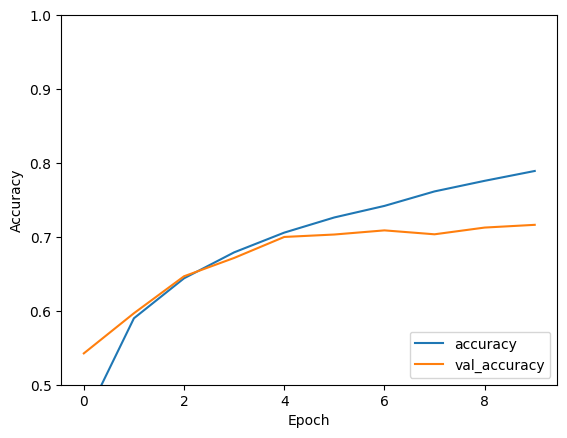

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7163000106811523


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.